In [265]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets    # import our handwriting dataset
from sklearn.neighbors import KNeighborsClassifier

In [266]:
mnist = datasets.load_digits()

In [267]:
X = mnist.data
# print(X.shape)
y = mnist.target
# print(y.shape)

In [268]:
mnist.images[0]     # view array of first image, each number represents intensity

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Text(0.5, 1.0, 'Number 0')

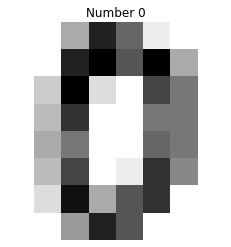

In [269]:
# plot sample array

n = 0

plt.imshow(mnist.images[n], cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number ' + str(y[n]))

In [270]:
# split data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=99, stratify=y)

In [271]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1203, 64)
(594, 64)
(1203,)
(594,)


In [272]:
# fit model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [273]:
# predict from test dataset

y_pred = knn.predict(X_test)
y_pred

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5, 1, 1, 6, 6, 1, 9, 1, 3, 8, 0, 0, 1,
       4, 3, 7, 5, 1, 5, 2, 3, 5, 0, 5, 2, 2, 3, 0, 6, 9, 3, 4, 9, 7, 4,
       5, 8, 7, 2, 5, 1, 6, 7, 7, 8, 4, 5, 1, 0, 3, 7, 6, 7, 0, 7, 3, 6,
       7, 2, 6, 1, 5, 0, 3, 9, 3, 1, 0, 4, 3, 0, 2, 7, 3, 7, 7, 9, 1, 4,
       7, 4, 1, 5, 1, 0, 4, 0, 8, 7, 6, 7, 9, 9, 4, 4, 8, 9, 0, 8, 3, 8,
       5, 5, 2, 2, 4, 0, 8, 3, 2, 2, 9, 5, 3, 6, 9, 2, 9, 0, 0, 0, 0, 5,
       4, 2, 8, 6, 9, 4, 4, 6, 7, 3, 8, 0, 6, 7, 2, 1, 8, 0, 7, 3, 1, 7,
       4, 3, 4, 2, 1, 5, 3, 3, 6, 9, 2, 2, 0, 6, 7, 8, 1, 7, 3, 8, 2, 5,
       4, 9, 2, 0, 5, 0, 9, 1, 1, 2, 8, 7, 7, 6, 5, 5, 7, 6, 0, 5, 7, 1,
       4, 5, 9, 0, 5, 1, 9, 9, 5, 6, 6, 7, 4, 9, 5, 4, 8, 8, 1, 3, 3, 1,
       2, 2, 9, 1, 9, 6, 4, 3, 8, 5, 0, 9, 2, 8, 4, 6, 0, 2, 7, 2, 3, 6,
       1, 8, 9, 5, 6, 0, 8, 5, 8, 6, 5, 0, 3, 1, 7, 0, 7, 2, 8, 5, 1, 5,
       6, 9, 3, 0, 0, 3, 9, 4, 5, 0, 6, 1, 3, 3, 7, 4, 1, 4, 0, 7, 1, 7,
       2, 6, 5, 9, 0, 0, 9, 6, 6, 0, 5, 4, 0, 1, 4,

In [274]:
# check accuracy

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.98      0.97        60
           2       1.00      0.98      0.99        59
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        60
           5       0.97      0.98      0.98        60
           6       1.00      1.00      1.00        60
           7       0.97      1.00      0.98        59
           8       1.00      0.95      0.97        58
           9       0.98      0.98      0.98        59

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



In [275]:
from sklearn import metrics
acc = metrics.balanced_accuracy_score(y_test, y_pred)   # we use balanced accuracy here instead of just accuracy because we want a better measure-- assume number of samples for each target is the same
print('accuracy: ' + str(acc))

accuracy: 0.986437755698422


In [278]:
im = im.reshape(1,-1)
guess = knn.predict(im)

print('The predicated number of the image [' + str(imgfile) + "] is " + str(guess) + ".")

The predicated number of the image [number.jpg] is [5].


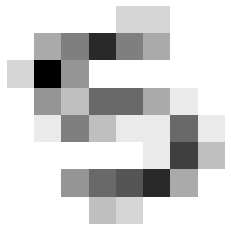

In [277]:
# test model on image not in dataset

def rgb2gray(rgb):  # function for converting to grayscale
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# feed and plot image
imgfile = 'number.jpg'
im = mpimg.imread(imgfile)
im = np.double(rgb2gray(im))
im = im/255
im=(16-im*16).astype(int)
plt.imshow(im, cmap = plt.cm.gray_r)
plt.axis('off')
plt.show()